In [64]:
import pandas as pd

In [65]:
colnames=['sentiment','news']
df = pd.read_csv('all-data.csv',names=colnames, encoding='ISO-8859-1')

In [66]:
df.head()

,sentiment,news
0,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
1,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
2,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
3,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
4,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."


In [67]:
# Permanently changes the pandas settings
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/tmp/ipykernel_320142/1970216217.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


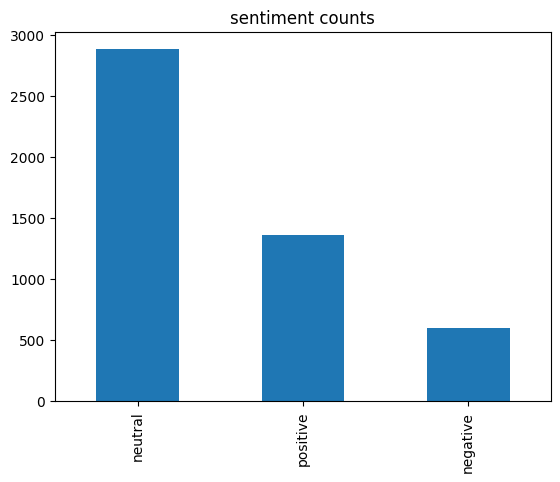

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

df['sentiment'].value_counts().plot(kind='bar', title='sentiment counts');

In [69]:
df.shape

(4846, 2)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4846 non-null   object
 1   news       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [71]:
df['news'].head()

0    According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .                                                                                                     
1    Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .                                      
2    The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .
3    With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .                      
4    According to the company 's updated strategy for the years 

In [72]:
import re                                  
import string 
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stopwords_english = stopwords.words('english')

In [74]:
from tqdm import tqdm

preprocessed_text = []

for sentence in tqdm(df['news']):
    
    sentence = re.sub(r'[^\w\s]', '', sentence)
    
    preprocessed_text.append(' '.join(token.lower()
                              for token in nltk.word_tokenize(sentence)
                              if token.lower() not in stopwords.words('english')))
    
df['news'] = preprocessed_text

100%|██████████████████████████████████████████████████████████| 4846/4846 [00:04<00:00, 1027.99it/s]


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(df['news'] ).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'],
                                                    test_size=0.33,
                                                    stratify=df['sentiment'],
                                                    random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3246, 2500), (1600, 2500), (3246,), (1600,))

In [82]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
  
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)
  
#testing the model
pred = model.predict(X_train)
print(accuracy_score(y_train,pred))

0.9996919285274184


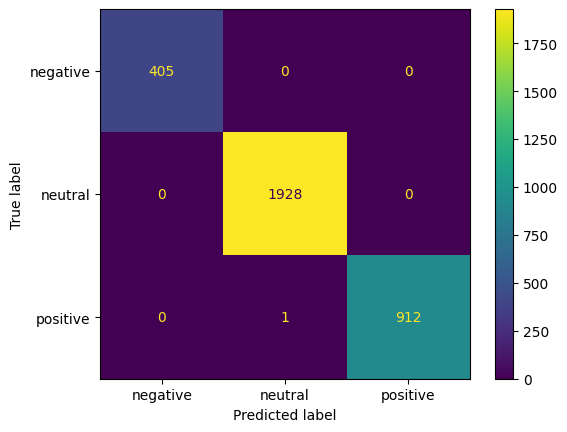

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

cm = confusion_matrix(y_train,pred)
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = ['negative', 'neutral', 'positive'])
  
cm_display.plot()
plt.show()